# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

데이터 살펴보기

In [2]:
df = pd.read_excel('BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

In [4]:
# 데이터 타입
df.dtypes

CRIM         float64
ZN           float64
INDUS        float64
CHAS           int64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD            int64
TAX            int64
PTRATIO      float64
B            float64
LSTAT        float64
MEDV         float64
CAT. MEDV      int64
dtype: object

In [5]:
# 결측값 확인
df.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

- 결측값이 없는 것을 확인함

## 데이터 분포 확인하기

In [6]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

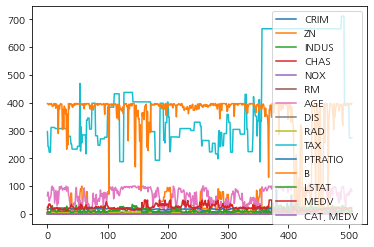

In [20]:
df.plot()

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평슈
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

In [45]:
# 변수간 상관계수
corr_df = df.corr()
corr_df.shape

(15, 15)

<AxesSubplot:>

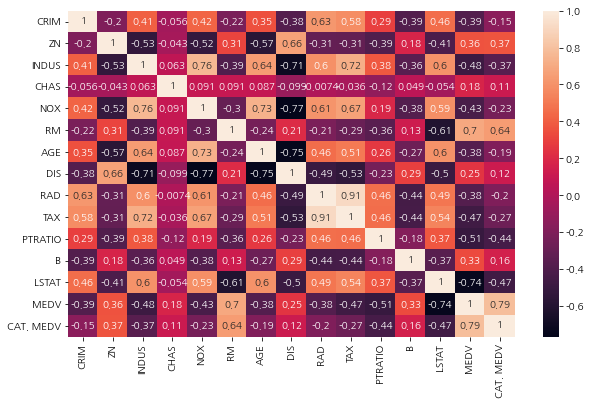

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True)

In [52]:
# 상관관계 높은 순 
abs_df = corr_df.loc[:'CAT. MEDV', 'MEDV'].abs().sort_values(ascending=False)
abs_df

MEDV         1.000000
CAT. MEDV    0.789789
LSTAT        0.737663
RM           0.695360
PTRATIO      0.507787
INDUS        0.483725
TAX          0.468536
NOX          0.427321
CRIM         0.388305
RAD          0.381626
AGE          0.376955
ZN           0.360445
B            0.333461
DIS          0.249929
CHAS         0.175260
Name: MEDV, dtype: float64

### 노후화 정도와 집값의 관계는?


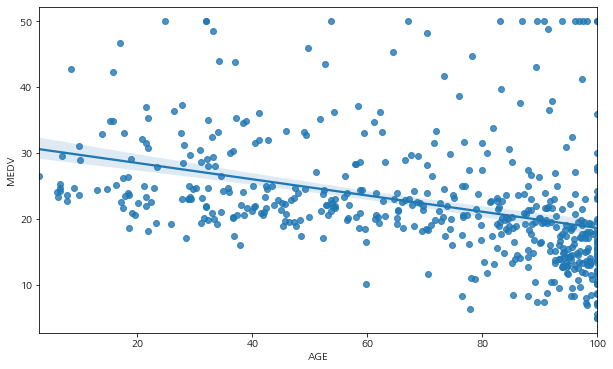

In [54]:
plt.figure(figsize=(10, 6))
sns.regplot(x='AGE', y='MEDV', data=df)
plt.show()

- AGE가 높음에 따라 MEDV가 낮은 수가 더 많은걸 확인할 수 있습니다.
- 따라서 노후화에 따라 집 값이 낮아지는 것을 확인할 수 있습니다.

### 직주근접?

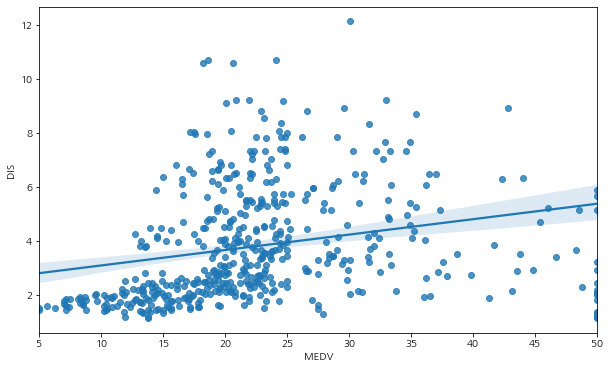

In [57]:
plt.figure(figsize=(10, 6))
sns.regplot(x='MEDV', y='DIS', data=df)
plt.show()


- DIS(직업센터까지의 접근성 지수)가 낮을수록 MEDV(주택가격)의 낮은 곳에 몰려있는 것을 확인할 수 있습니다.
- 따라서 접근성이 낮을수록 주택 가격이 낮은 것을 확인할 수 있습니다.

### 찰스강뷰

<AxesSubplot:xlabel='CHAS', ylabel='count'>

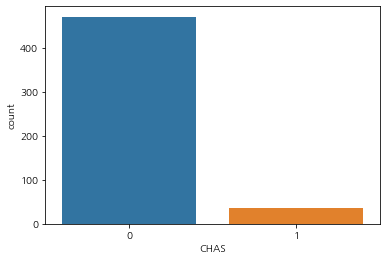

In [61]:
sns.countplot(data=df, x='CHAS')

- 찰스강의 경계에 위치한 거주지가 100 가구가 안되고, 경계에 위치하지 않은 거주지는 400 가구가 넘는다

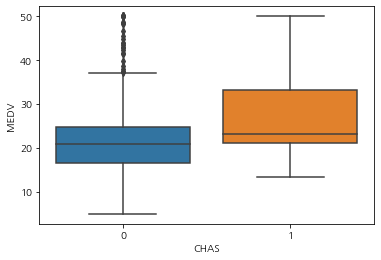

In [106]:
sns.boxplot(x='CHAS', y='MEDV', data=df)
plt.show()

- 찰스강의 경계에 위치한 거주지의 MEDV 값이 더 높은 것으로 보아 찰스강뷰가 보일수록 값이 더 비싸지는 것을 알 수 있다

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>